In [1]:
#pip install pandas_datareader
#pip install yfinance

In [2]:
import numpy as np

import pandas_datareader as web
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('fivethirtyeight') 

#import pypfopt

In [3]:
#defining time range
from datetime import datetime, timedelta
start_date =  datetime.today() - timedelta(days=365) #Last 365 days
end_date = datetime.today()
#print(start, end)

symbols = ["AAPL", "MSFT", "NVDA", "V", "MA", "AVGO", "ADBE", "ACN", "CSCO", "CRM", "SPY", "BIL"] #"SPY", "BIL" MUST be final 2 symbols

stock_data = web.get_data_yahoo(symbols, start= start_date, end= end_date)

In [4]:
#print(stock_data)

pct_returns_df = stock_data["Adj Close"].pct_change().apply(lambda x: np.log(1+x))
pct_returns_df.dropna(inplace= True)
#print(pct_returns_df)

excess_returns_df = pct_returns_df.sub(pct_returns_df['BIL'], axis= 0)
print(excess_returns_df)

Symbols         AAPL      MSFT      NVDA         V        MA      AVGO      ADBE       ACN      CSCO       CRM       SPY  BIL
Date                                                                                                                         
2021-08-13  0.001300  0.010326  0.014008  0.003594  0.002016  0.003806  0.004546  0.005129  0.001308  0.012572  0.001709  0.0
2021-08-16  0.013676  0.006177 -0.011641  0.011800  0.002449  0.004283 -0.000362  0.014950 -0.003152 -0.009207  0.002571  0.0
2021-08-17 -0.006173 -0.005173 -0.024971 -0.003533 -0.000908 -0.019549 -0.003035  0.003194 -0.004809 -0.008908 -0.006577  0.0
2021-08-18 -0.025832 -0.006138 -0.021716 -0.012442 -0.006297 -0.020514 -0.013061 -0.014530 -0.015474  0.016981 -0.011005  0.0
2021-08-19  0.002102  0.020344  0.038820 -0.000478 -0.010354  0.009458  0.017007  0.011117  0.037501  0.007118  0.001328  0.0
...              ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       .

         Standard Deviation  Mean Excess Return
Symbols                                        
AAPL               0.019234            0.000507
MSFT               0.019090           -0.000014
NVDA               0.037621           -0.000418
V                  0.019583           -0.000359
MA                 0.020987           -0.000113
AVGO               0.021061            0.000581
ADBE               0.025679           -0.001512
ACN                0.018577           -0.000051
CSCO               0.017616           -0.000714
CRM                0.027380           -0.001144
SPY                0.013003           -0.000183
BIL                0.000000            0.000000


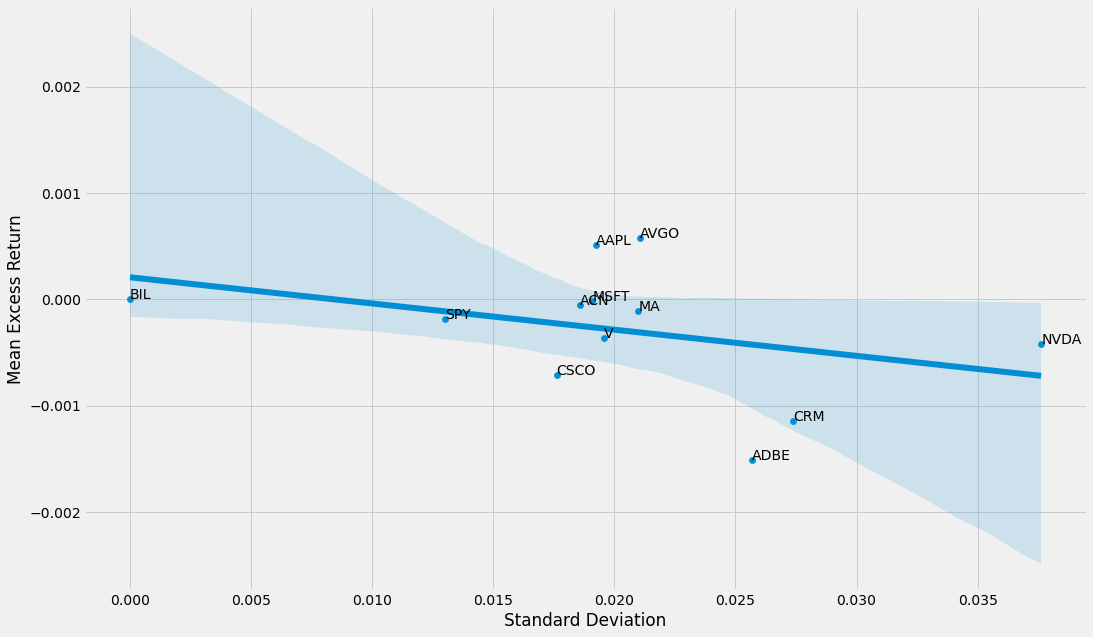

In [5]:
import seaborn as sns

excess_std_mean_df = pd.DataFrame(columns = ['Standard Deviation', 'Mean Excess Return'])
excess_std_mean_df['Standard Deviation'] = excess_returns_df.std()
excess_std_mean_df['Mean Excess Return'] = excess_returns_df.mean()
print(excess_std_mean_df)

excess_std_mean_df.plot(kind = 'scatter', x = 'Standard Deviation', y = 'Mean Excess Return')
for i, symbol in enumerate(symbols):
    plt.annotate(symbol, (excess_std_mean_df['Standard Deviation'][i], excess_std_mean_df['Mean Excess Return'][i]))

#a, b = np.polyfit(excess_std_mean_df['Standard Deviation'], excess_std_mean_df['Mean Excess Return'], 1)
#plt.plot(excess_std_mean_df['Standard Deviation'], a*excess_std_mean_df['Standard Deviation']+b, linestyle = '--', linewidth = 2)

sns.regplot(x= excess_std_mean_df['Standard Deviation'], y= excess_std_mean_df['Mean Excess Return']) #ci= 0
plt.show()

Symbols      AAPL      MSFT      NVDA         V        MA      AVGO      ADBE       ACN      CSCO       CRM       SPY  BIL
Symbols                                                                                                                   
AAPL     1.000000  0.777833  0.719917  0.577717  0.582651  0.724837  0.682306  0.678242  0.529382  0.621575  0.853520  NaN
MSFT     0.777833  1.000000  0.747256  0.554014  0.573287  0.714062  0.780508  0.730886  0.502102  0.720161  0.844585  NaN
NVDA     0.719917  0.747256  1.000000  0.504484  0.519289  0.768272  0.725405  0.637991  0.411746  0.691948  0.801593  NaN
V        0.577717  0.554014  0.504484  1.000000  0.908724  0.498152  0.476414  0.567027  0.369458  0.500177  0.696036  NaN
MA       0.582651  0.573287  0.519289  0.908724  1.000000  0.519855  0.483870  0.600579  0.379918  0.544566  0.714426  NaN
AVGO     0.724837  0.714062  0.768272  0.498152  0.519855  1.000000  0.661872  0.675651  0.574394  0.587011  0.792724  NaN
ADBE     0.68230

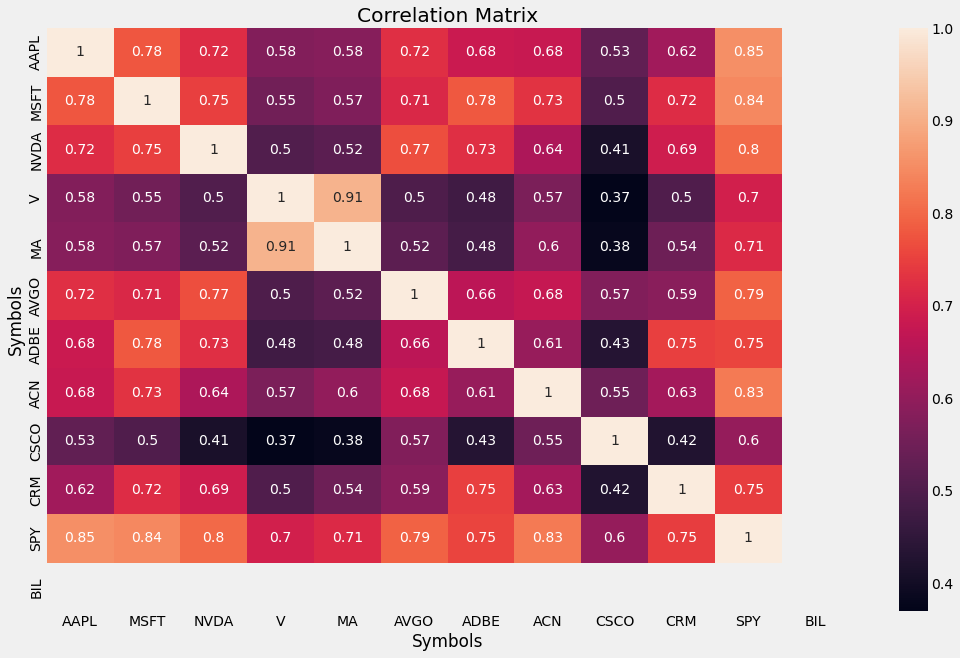

<Figure size 1152x720 with 0 Axes>

In [6]:
corr_matrix_excess = excess_returns_df.corr()
print(corr_matrix_excess)
sns.heatmap(corr_matrix_excess, annot= True)
plt.title("Correlation Matrix")
plt.show()
plt.clf()

In [7]:
from sklearn.linear_model import LinearRegression

excess_returns_df = excess_returns_df.dropna()
betas_df = pd.DataFrame(columns= symbols)
#print(betas_df)
alphas_df = pd.DataFrame(columns= symbols)
#print(expected_returns_df)
alphas_list = []

for column in excess_returns_df:   
    x = np.array(excess_returns_df['SPY']).reshape((-1, 1))
    #print(x)

    y = np.array(excess_returns_df[column])
    #print(y)
    
    model = LinearRegression().fit(x, y)
    alphas_df[column] = pd.Series(model.intercept_)
    betas_df[column] = model.coef_
    #print(column, model.intercept_, model.coef_)
    alphas_list.append(model.intercept_)

alphas_list = alphas_list[:-2]
#print(alphas_list)
print(alphas_df)
print()
print(betas_df)

       AAPL      MSFT      NVDA         V        MA      AVGO      ADBE       ACN      CSCO       CRM  SPY  BIL
0  0.000738  0.000213  0.000005 -0.000168  0.000098  0.000815 -0.001239  0.000164 -0.000565 -0.000858  0.0  0.0

       AAPL      MSFT      NVDA         V        MA      AVGO      ADBE      ACN      CSCO       CRM  SPY  BIL
0  1.262493  1.239916  2.319112  1.048235  1.153079  1.283964  1.489312  1.17866  0.818259  1.569346  1.0 -0.0


In [8]:
hedge_df = excess_returns_df.reset_index()
hedge_df = hedge_df.iloc[:,1:]
#print(hedge_df)

for col in hedge_df:
    for i, row_value in hedge_df[col].iteritems():
        hedge_df[col][i] = hedge_df[col][i] - betas_df[col]*hedge_df["SPY"][i]

hedge_df.drop(index = hedge_df.index[0], axis= 0, inplace= True)
hedge_df.drop(["SPY", "BIL"], axis= 1, inplace= True)
print(hedge_df)

Symbols      AAPL      MSFT      NVDA         V        MA      AVGO      ADBE       ACN      CSCO       CRM
1        0.010430  0.002989 -0.017602  0.009105 -0.000515  0.000983 -0.004190  0.011920 -0.005255 -0.013241
2        0.002130  0.002982 -0.009719  0.003361  0.006676 -0.011105  0.006760  0.010945  0.000573  0.001413
3       -0.011938  0.007508  0.003806 -0.000906  0.006393 -0.006384  0.003329 -0.001558 -0.006468  0.034252
4        0.000425  0.018696  0.035739 -0.001870 -0.011886  0.007752  0.015028  0.009552  0.036415  0.005034
5        0.000099  0.015427  0.031760 -0.009215 -0.015653 -0.006719  0.003263  0.003974  0.009967 -0.000419
..            ...       ...       ...       ...       ...       ...       ...       ...       ...       ...
246      0.000803 -0.000462 -0.007620  0.012964  0.006020 -0.000229  0.009200 -0.002032 -0.006842 -0.002988
247     -0.001412 -0.007730 -0.062217 -0.010660 -0.013722 -0.009253  0.003881  0.004552  0.001153 -0.000326
248      0.005298  0.011946 

Symbols      AAPL      MSFT      NVDA         V        MA      AVGO      ADBE       ACN      CSCO       CRM
Symbols                                                                                                    
AAPL     0.000101  0.000021  0.000026 -0.000006 -0.000011  0.000020  0.000019 -0.000009  0.000005 -0.000008
MSFT     0.000021  0.000105  0.000050 -0.000013 -0.000012  0.000018  0.000071  0.000012 -0.000003  0.000047
NVDA     0.000026  0.000050  0.000508 -0.000040 -0.000042  0.000106  0.000117 -0.000017 -0.000048  0.000097
V       -0.000006 -0.000013 -0.000040  0.000198  0.000170 -0.000022 -0.000025 -0.000003 -0.000018 -0.000010
MA      -0.000011 -0.000012 -0.000042  0.000170  0.000217 -0.000021 -0.000030  0.000004 -0.000019  0.000007
AVGO     0.000020  0.000018  0.000106 -0.000022 -0.000021  0.000165  0.000035  0.000008  0.000036 -0.000002
ADBE     0.000019  0.000071  0.000117 -0.000025 -0.000030  0.000035  0.000285 -0.000007 -0.000010  0.000130
ACN     -0.000009  0.000012 

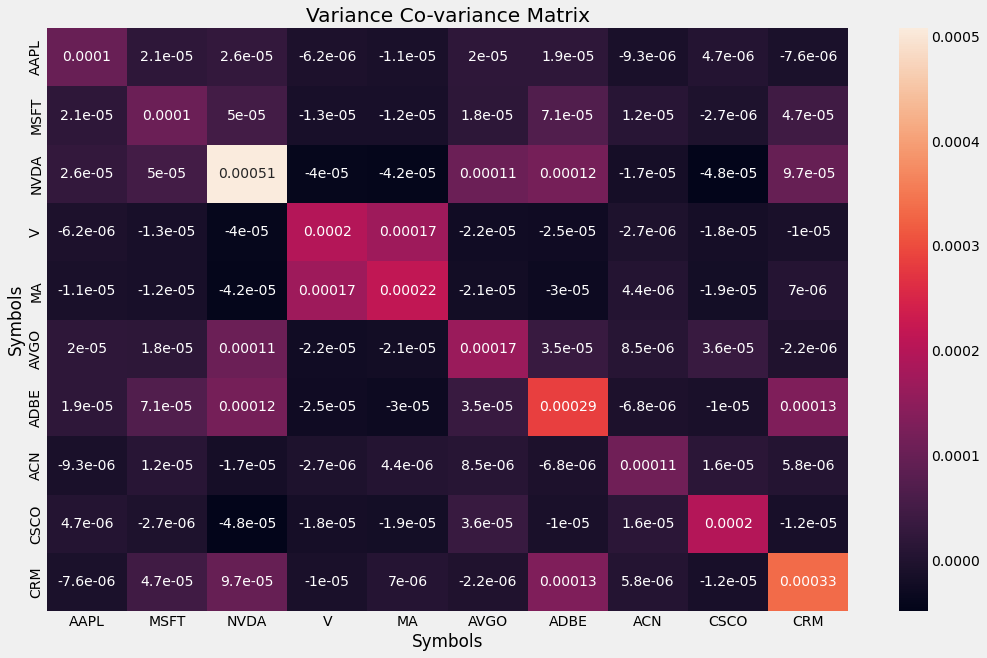


E[R]-rf
AAPL    0.000738
MSFT    0.000213
NVDA    0.000005
V      -0.000168
MA      0.000098
AVGO    0.000815
ADBE   -0.001239
ACN     0.000164
CSCO   -0.000565
CRM    -0.000858
dtype: float64


In [9]:
hedge_var_covar = hedge_df.cov()
#print("Variance - covariance matrix")
print(hedge_var_covar)
sns.heatmap(hedge_var_covar, annot= True)
plt.title("Variance Co-variance Matrix")
plt.show()

print()
print("E[R]-rf")
print(pd.Series(alphas_list, index= symbols[:-2]))

{'AAPL': 0.5, 'MSFT': 0.28791, 'NVDA': -0.06203, 'V': -0.19115, 'MA': 0.27745, 'AVGO': 0.46481, 'ADBE': -0.2, 'ACN': 0.21031, 'CSCO': -0.2, 'CRM': -0.0873}
Expected annual return: 0.1%
Annual volatility: 1.0%
Sharpe Ratio: 0.14


C:\Users\Ben\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

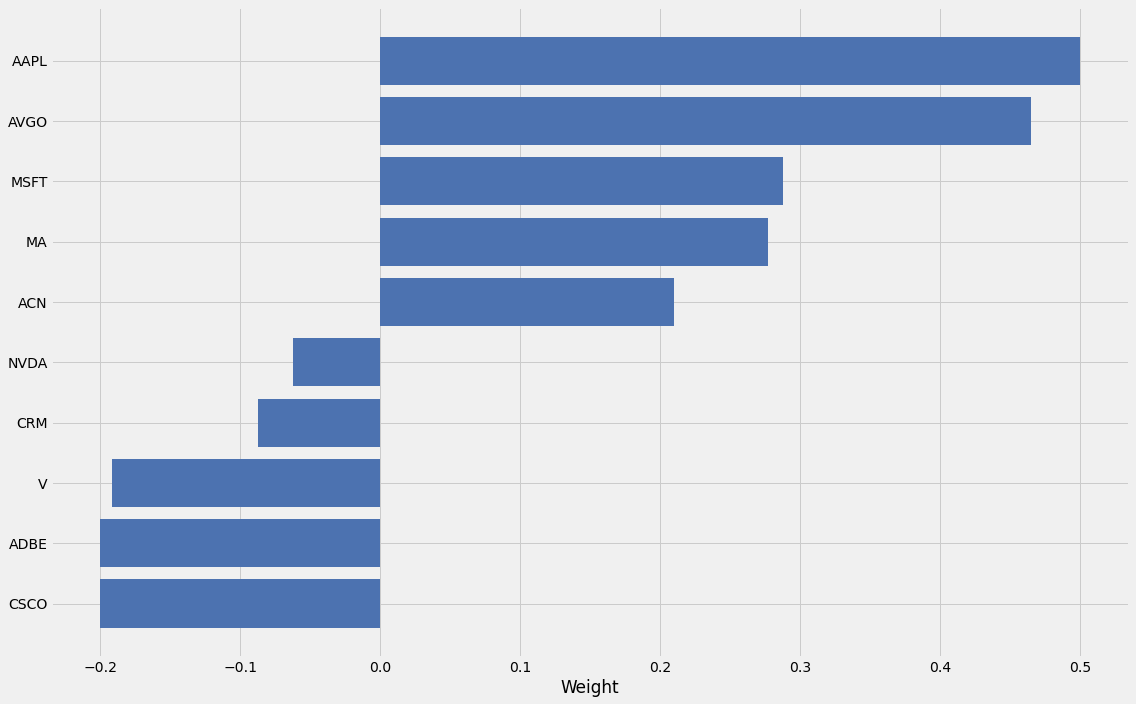

In [10]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

#excess_returns = excess_std_mean_df["Mean Excess Return"].drop(["SPY", "BIL"])
#print(excess_returns)

ef = EfficientFrontier(alphas_list, hedge_var_covar, weight_bounds= (-0.2, 0.5), solver= 'ECOS_BB') # weight_bounds= (-1, 1)
weights = ef.max_sharpe(risk_free_rate= 0)
cleaned_weights = dict(ef.clean_weights())

print(cleaned_weights)
ef.portfolio_performance(verbose = True, risk_free_rate= 0)

plotting.plot_weights(cleaned_weights)

In [11]:
final_df = pd.DataFrame.from_dict(cleaned_weights, orient= 'index')
final_df.rename(columns= {0: "Weights"}, inplace= True)

#print(final_df)
#print(betas_df.columns)
#if "SPY" in betas_df.columns :
#betas_df.drop(["SPY", "BIL"], axis= 1, inplace= True)
#print(betas_df.values)
final_df["Beta"] = betas_df.iloc[:,:-2].values.T
final_df["Market"] = final_df["Weights"]*final_df["Beta"]*-1
final_df["BIL"] = final_df["Weights"]*(final_df["Beta"]-1)

print(final_df)

sum_market = final_df["Market"].sum()
sum_bil = final_df["BIL"].sum()
print()
print("Building a dollar neutral strategy:")
print("Sum SPY: ", sum_market, "Sum BIL: ", sum_bil)
print("Sum SPY+BIL: ", sum_market+sum_bil)



      Weights      Beta    Market       BIL
AAPL  0.50000  1.262493 -0.631246  0.131246
MSFT  0.28791  1.239916 -0.356984  0.069074
NVDA -0.06203  2.319112  0.143854 -0.081824
V    -0.19115  1.048235  0.200370 -0.009220
MA    0.27745  1.153079 -0.319922  0.042472
AVGO  0.46481  1.283964 -0.596799  0.131989
ADBE -0.20000  1.489312  0.297862 -0.097862
ACN   0.21031  1.178660 -0.247884  0.037574
CSCO -0.20000  0.818259  0.163652  0.036348
CRM  -0.08730  1.569346  0.137004 -0.049704

Building a dollar neutral strategy:
Sum SPY:  -1.2100927946364002 Sum BIL:  0.21009279463640018
Sum SPY+BIL:  -1.0


       Weights  Last Price       $ Amount  Number of Shares
SPY  -1.210093  419.989990 -605046.397318           -1440.6
ADBE -0.200000  434.890015 -100000.000000            -229.9
CSCO -0.200000   45.900002 -100000.000000           -2178.6
V    -0.191150  211.080002  -95575.000000            -452.8
CRM  -0.087300  186.729996  -43650.000000            -233.8
NVDA -0.062030  179.419998  -31015.000000            -172.9
BIL   0.210093   91.430000  105046.397318            1148.9
ACN   0.210310  314.420013  105155.000000             334.4
MA    0.277450  350.579987  138725.000000             395.7
MSFT  0.287910  287.019989  143955.000000             501.6
AVGO  0.464810  545.429993  232405.000000             426.1
AAPL  0.500000  168.490005  250000.000000            1483.8


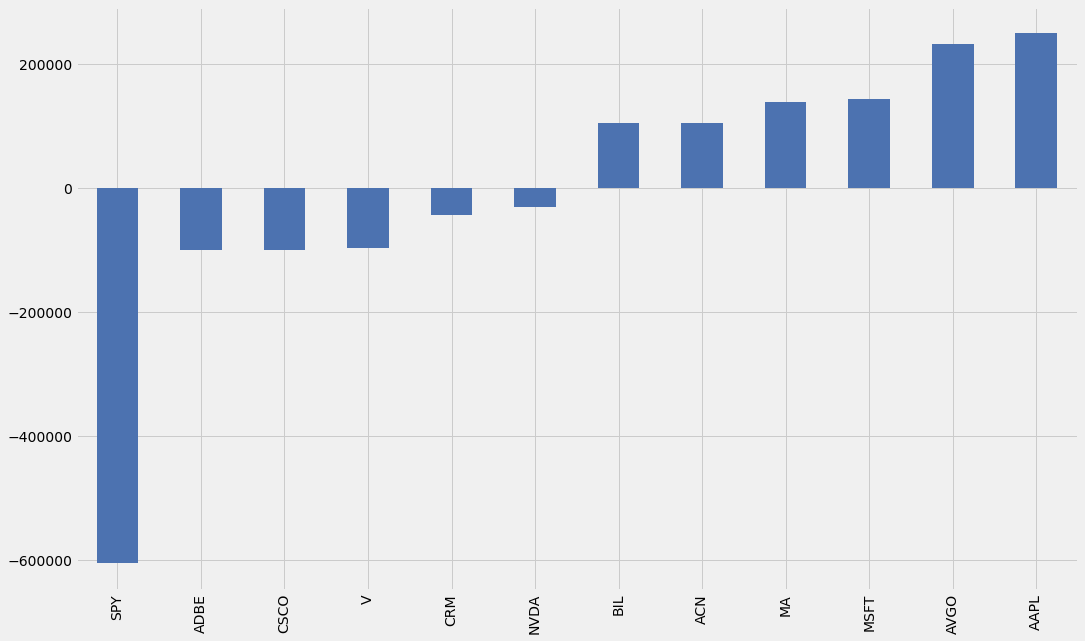

In [12]:
from pypfopt.discrete_allocation import get_latest_prices

cash_investment = 500000

hedge_weights  = cleaned_weights
hedge_weights["SPY"] = sum_market
hedge_weights["BIL"] = sum_bil

discrete_df = pd.DataFrame.from_dict(hedge_weights, orient= 'index')
discrete_df.rename(columns= {0: "Weights"}, inplace= True)
discrete_df["Last Price"] = get_latest_prices(stock_data["Adj Close"])
discrete_df["$ Amount"] = discrete_df["Weights"]*cash_investment
discrete_df["Number of Shares"] = round(discrete_df["$ Amount"]/discrete_df["Last Price"], 1)

discrete_df.sort_values(by=["$ Amount"], inplace= True)
print(discrete_df)
discrete_df["$ Amount"].plot(kind = 'bar')
plt.show()